In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = pd.read_excel("social.xlsx")
print(data)
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = RandomForestClassifier(n_estimators=3, max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)

     User ID   Gender   Age   EstimatedSalary   Purchased
0    15624510    Male     19             19000          0
1    15810944    Male     35             20000          0
2    15668575  Female     26             43000          0
3    15603246  Female     27             57000          0
4    15804002    Male     19             76000          0
..        ...      ...   ...               ...        ...
395  15691863  Female     46             41000          1
396  15706071    Male     51             23000          1
397  15654296  Female     50             20000          1
398  15755018    Male     36             33000          0
399  15594041  Female     49             36000          1

[400 rows x 5 columns]
Accuracy: 0.85


In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


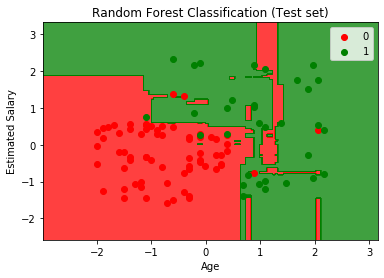

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()